In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
%matplotlib inline 



In [9]:
data = pd.read_pickle('../user_table.pickle')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81714 entries, 1 to 247602
Data columns (total 13 columns):
topic_mode            81714 non-null float64
suggested             81714 non-null float64
review_mode           81714 non-null float64
time_taken            81714 non-null float64
correct               81714 non-null float64
count_attempts        81714 non-null float64
hint_used             81714 non-null float64
count_hints           81714 non-null float64
earned_proficiency    81714 non-null float64
points_earned         81714 non-null float64
days_before_cutoff    81714 non-null float64
activity_count        81714 non-null int64
target                81714 non-null int64
dtypes: float64(11), int64(2)
memory usage: 8.7 MB


In [59]:
y = data['target'].values

In [60]:
X = data.iloc[:,:-1].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [63]:
X_test, y_test

(array([[  1.        ,   0.47619048,   0.        , ..., 156.71428571,
         105.        ,  21.        ],
        [  0.87096774,   0.32258065,   0.        , ..., 153.77419355,
          22.        ,  31.        ],
        [  1.        ,   0.        ,   0.        , ..., 150.        ,
          76.        ,   3.        ],
        ...,
        [  1.        ,   0.59459459,   0.        , ..., 175.41891892,
          38.21621622,  74.        ],
        [  0.        ,   0.85714286,   0.        , ..., 192.85714286,
         161.        ,   7.        ],
        [  0.        ,   0.        ,   0.        , ...,  30.74468085,
          28.95744681,  94.        ]]), array([0, 0, 0, ..., 0, 0, 1]))

In [64]:
model = LogisticRegression(solver='lbfgs')

In [65]:
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_hat = model.predict(X_test)

In [67]:
model.score(X_test,y_test)

0.8793871457242156

In [68]:
precision_score(y_test, y_hat)

0.5700712589073634

In [69]:
recall_score(y_test, y_hat)

0.09512485136741974

In [34]:
no_days_dbc = data.drop(columns='days_before_cutoff')

In [36]:
no_days_dbc.head()

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,activity_count,target
user_id,,,,,,,,,,,,
1,0.333333,0.555556,0.0,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444,27,0
4,0.000000,0.625000,0.0,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000,8,0
5,1.000000,0.572581,0.0,10.774194,0.846774,1.217742,0.056452,0.056452,0.096774,174.895161,124,0
8,0.648352,0.527473,0.0,5.516484,0.835165,1.109890,0.076923,0.494505,0.076923,135.571429,91,1
9,0.455882,0.279412,0.0,16.750000,0.764706,1.794118,0.073529,0.132353,0.029412,138.411765,68,1


In [90]:
np.exp(model.coef_)

array([[0.95581532, 1.03144315, 1.00021474, 0.99999849, 0.91933945,
        0.56021696, 0.85584799, 0.5510268 , 0.99962319, 0.99277881,
        1.00171914]])

In [103]:
y_hat = model.predict(X_test[[4]])

In [104]:
y_hat

array([0])

In [102]:
model.predict_proba(X_test[[4]])

array([[0.87847916, 0.12152084]])

In [73]:
precision_score(y_test, y_hat)

0.5778301886792453

In [74]:
recall_score(y_test, y_hat)

0.09902991107518189

In [88]:
model.predict_proba(X_test)

array([[0.88776339, 0.11223661],
       [0.93220707, 0.06779293],
       [0.91548106, 0.08451894],
       ...,
       [0.89741105, 0.10258895],
       [0.81974189, 0.18025811],
       [0.903778  , 0.096222  ]])

In [79]:
def standard_confusion_matrix(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)

    tp = np.sum((y_true == y_predict) & (y_predict==1))
    fp = np.sum((y_true != y_predict) & (y_predict==1))
    fn = np.sum((y_true != y_predict) & (y_predict==0))
    tn = np.sum((y_true == y_predict) & (y_predict==0))
   
    return np.array([[tp, fp], [fn, tn]])

In [80]:
standard_confusion_matrix(y_test, y_hat)

array([[  245,   179],
       [ 2229, 17776]])

In [83]:
def roc_curve_(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    sorted = np.sort(probabilities)
    threshold = list(sorted)
    true_pos = labels.sum()
    true_neg =  len(labels)-true_pos
    
    TPR =[]
    FPR = []
    for vals in threshold:        
        pos = np.sum((vals <= probabilities) & (labels==True))
        f_pos = np.sum((vals <= probabilities) & (labels==False))

        TPR.append(pos/true_pos)
        FPR.append(f_pos/true_neg)
    return TPR, FPR, threshold

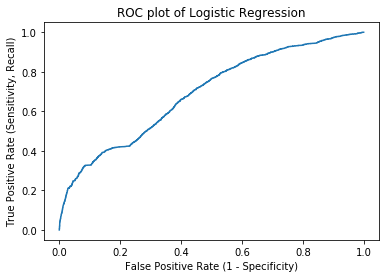

In [86]:
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve_(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Logistic Regression")
plt.show()
